## Pet Supply Background
*PetMind is a retailer of products for pets. They are based in the United States.* *PetMind sells products that are a mix of luxury items and everyday items. Luxury items include toys. Everyday items include food.*

*The company wants `to increase sales` by selling more `everyday products` repeatedly. They have been testing this approach for the last year. They now want a report `on how repeat purchases impact sales`*

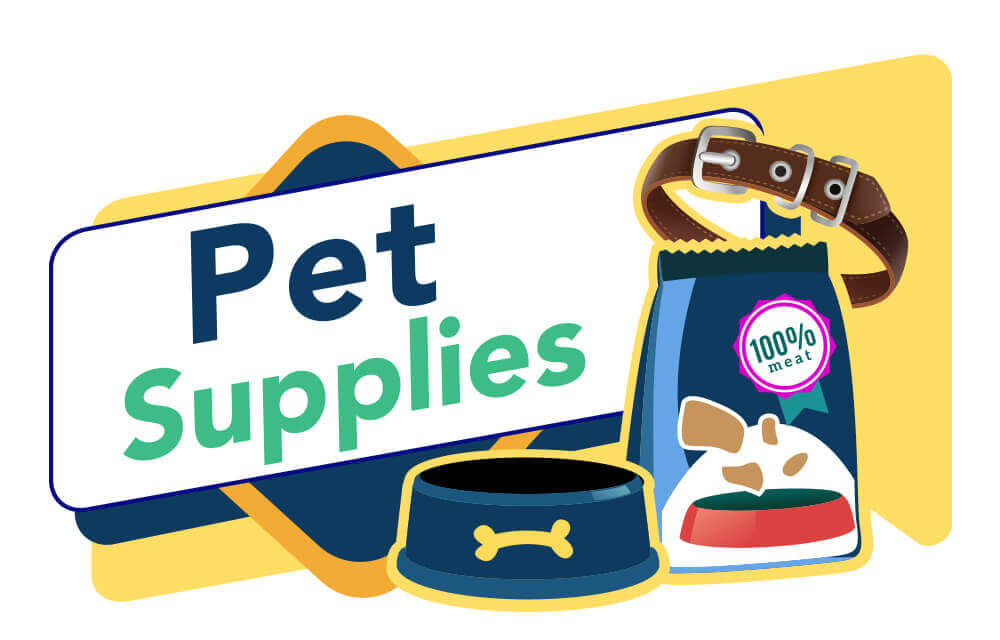

In [52]:
# import the necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# load and read file
df = pd.read_csv(r'pet_supplies_2212.csv')
df

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1


## Data Inspection

In [54]:
# shape of the data
df.shape

(1500, 8)

In [55]:
# check the data types
df.dtypes

product_id           int64
category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object

In [56]:
# check for duplicates
df.duplicated().sum()

0

In [57]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [58]:
# checking the missing values
df.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

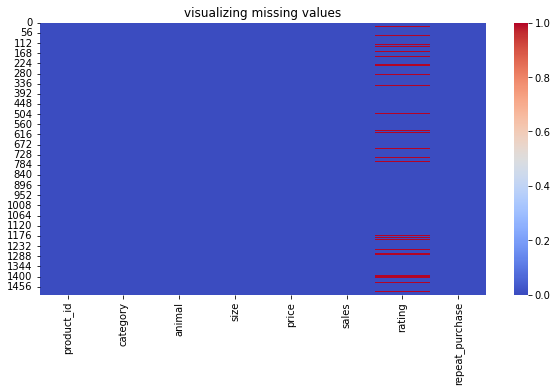

In [59]:
# visualize the missing values
plt.figure(figsize = (10, 5))
plt.title('visualizing missing values')
sns.heatmap(df.isnull(), cbar = True, cmap = 'coolwarm')
plt.show()

In [60]:
# statistical descriptive analysis of the numerical features
df.describe().astype('int')

,product_id,sales,rating,repeat_purchase
count,1500,1500,1350,1500
mean,750,996,4,0
std,433,323,1,0
min,1,286,1,0
25%,375,747,4,0
50%,750,1000,5,1
75%,1125,1158,6,1
max,1500,2255,9,1


## Data validation and wrangling

In [61]:
# select categorical variables
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# print the list of categorical variables
print(cat_vars)

# value counts for categorical variables
for column in cat_vars:
    print(df[column].value_counts())

['category', 'animal', 'size', 'price']
category
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: count, dtype: int64
animal
Cat     567
Fish    369
Dog     367
Bird    197
Name: count, dtype: int64
size
small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: count, dtype: int64
price
unlisted    150
22.98        13
28           10
28.03         8
19.94         8
           ... 
38.66         1
36            1
19.97         1
39.19         1
25.79         1
Name: count, Length: 707, dtype: int64


In [62]:
# select numerical variables
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# print the list of numerical variables
print(num_vars)

# value counts for numerical variables
for column in num_vars:
    print(df[column].value_counts())

['product_id', 'sales', 'rating', 'repeat_purchase']
product_id
1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1
1500    1
Name: count, Length: 1500, dtype: int64
sales
1034.36    3
742.87     2
1342.90    2
1031.11    2
1348.27    2
          ..
1072.20    1
727.87     1
1460.29    1
1196.56    1
826.08     1
Name: count, Length: 1476, dtype: int64
rating
5.0    304
6.0    299
4.0    283
3.0    190
7.0    143
8.0     61
2.0     43
9.0     15
1.0     12
Name: count, dtype: int64
repeat_purchase
1    906
0    594
Name: count, dtype: int64


In [63]:
# Replace '-' in category column with 'unknown'
df['category'] = df['category'].str.replace('-', 'unknown')

# Replace size values with the described word
df['size'] = df['size'].str.replace('small', 'Small')
df['size'] = df['size'].str.replace('SMALL', 'Small')
df['size'] = df['size'].str.replace('medium', 'Medium')
df['size'] = df['size'].str.replace('MEDIUM', 'Medium')
df['size'] = df['size'].str.replace('large', 'Large')
df['size'] = df['size'].str.replace('LARGE', 'Large')

In [64]:
# Replace the 'unlisted' values with NaN
df['price'] = df['price'].replace('unlisted', np.nan)

# Convert the 'price' column to float
df['price'] = df['price'].astype(float)

# Fill the missing values with the overall median of the price column
df['price'] = df['price'].fillna(df['price'].median())

# Fill the missing values in rating with 0
df['rating'] = df['rating'].fillna(0)

In [65]:
# check for missing values
df[['price', 'rating']].isnull().sum()

price     0
rating    0
dtype: int64

In [66]:
# check the first head of the dataset
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [67]:
# check the datatypes 
df.dtypes

product_id           int64
category            object
animal              object
size                object
price              float64
sales              float64
rating             float64
repeat_purchase      int64
dtype: object

In [68]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


## Exploratory Data Analysis

### Univariate Analysis

In [69]:
count_category = df['category'].value_counts().sort_values(ascending = False)
count_category

category
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
unknown       25
Name: count, dtype: int64

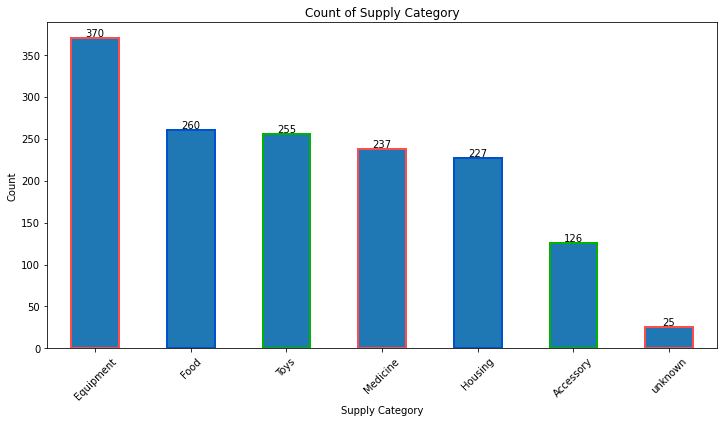

In [70]:
# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
ax = count_category.plot.bar(edgecolor=['#ff4d4d','#0052cc','#00b300'], linewidth=2)

# Set the title and labels
plt.title('Count of Supply Category')
plt.xlabel('Supply Category')
plt.ylabel('Count')

# Add data labels to the bars
for i, v in enumerate(count_category.values):
    ax.text(i, v, '{:,.0f}'.format(v), ha='center', va='bottom')
    
# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()

It shows the number of items sold in different categories, with `the highest number of items sold in the Equipment category at 370 units`. This is followed by the Food category at 260 units, Toys at 255 units, Medicine at 237 units, Housing at 227 units, Accessory at 126 units, and an unknown category at 25 units.

The Equipment category appears to be the most popular among customers, with a significantly higher number of items sold compared to other categories. This suggests that customers may be more interested in purchasing equipment items, such as electronics or tools, than other types of products.

The Food and Toys categories are also popular among customers, with a relatively high number of items sold in each category. This suggests that customers may value food and toys as essential or enjoyable items.

The Medicine and Housing categories have a lower number of items sold compared to the other categories, which suggests that these items may be less frequently purchased or less popular among customers. However, they are still significant categories that may represent important needs or interests for certain customers.

The Accessory category has the lowest number of items sold, which suggests that customers may be less interested in purchasing accessory items, such as jewelry or fashion accessories.

Overall, this data provides insights into customer preferences and interests across different categories. Businesses can use this information to identify areas of potential growth or opportunities for improvement, such as increasing marketing efforts for popular categories or developing new products to meet customer needs in less popular categories.

In [71]:
count_animal = df['animal'].value_counts().sort_values(ascending = True)
count_animal

animal
Bird    197
Dog     367
Fish    369
Cat     567
Name: count, dtype: int64

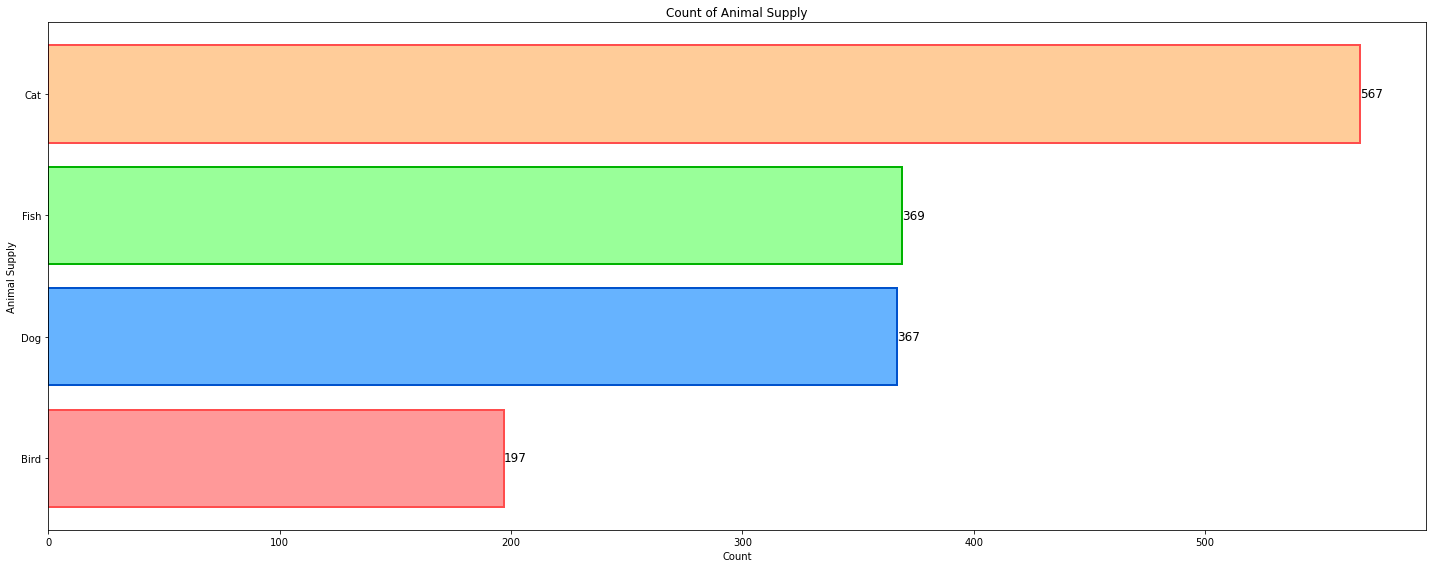

In [72]:
# Set the colors for each slice of the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#ff4d4d']

# Create a horizontal bar chart
plt.figure(figsize=(20, 8))
plt.barh(count_animal.index, count_animal.values, color=colors, edgecolor=['#ff4d4d','#0052cc','#00b300'], linewidth=2)

# Add data labels to each bar
for i, v in enumerate(count_animal.values):
    plt.text(v, i, '{:,.0f}'.format(v), color='black', fontsize=12, ha='left', va='center')

# Set the title and labels
plt.title('Count of Animal Supply')
plt.xlabel('Count')
plt.ylabel('Animal Supply')


plt.tight_layout()
plt.show()

It shows the number of animals owned by customers in different categories, with the highest number of animals owned in the `Cat category at 567 units`. This is followed by Fish at 369 units, Dog at 367 units, and Bird at 197 units.

*The Cat category appears to be the most popular among customers, with a significantly higher number of cats owned compared to other types of animals. This suggests that customers may prefer cats as pets over other types of animals.*

The Fish and Dog categories have a relatively high number of animals owned in each category, which suggests that customers may value fish and dogs as popular choices for pets as well.

The Bird category has the lowest number of animals owned, which suggests that customers may be less interested in owning birds as pets.

Overall, this data provides insights into customer preferences and interests in owning pets across different animal categories. Businesses can use this information to identify areas of potential growth or opportunities for improvement, such as developing new products or services that cater to popular pet categories or offering targeted promotions to customers who own pets in less popular categories.

In [73]:
count_size = df['size'].value_counts()
count_size

size
Small     754
Medium    492
Large     254
Name: count, dtype: int64

In [74]:
import plotly.graph_objs as go
# Define the colors and labels for the pie chart
colors = ['green', 'orange', 'blue', 'red']
labels = count_size.index

# Create a pie chart trace with custom colors and labels
trace = go.Pie(labels=labels, values=count_size.values, hole=0.7,
               marker=dict(colors=colors, line=dict(color='white', width=2)))

# Create a layout with a custom title
layout = go.Layout(title='Pet Supply Size')

# Create a figure with the trace and layout, and display it
fig = go.Figure(data=[trace], layout=layout)
fig.show()

It shows the distribution of items sold in different size categories, `with the highest number of items sold in the Small category at 754 units`. This is followed by Medium at 492 units and Large at 254 units.

The Small category appears to be the most popular among customers, with a significantly higher number of small-sized items sold compared to medium and large-sized items. This suggests that customers may prefer smaller-sized items for various reasons, such as affordability, convenience, or portability.

The Medium category has a relatively high number of items sold, which suggests that customers may value medium-sized items as well.

The Large category has the lowest number of items sold, which suggests that customers may be less interested in purchasing large-sized items.

Overall, this data provides insights into customer preferences and interests in purchasing items across different size categories. Businesses can use this information to identify areas of potential growth or opportunities for improvement, such as developing new products or services that cater to popular size categories or offering targeted promotions to customers who prefer certain size categories.

In [75]:
unique_rating = df['rating'].value_counts().sort_values(ascending = False)
unique_rating

rating
5.0    304
6.0    299
4.0    283
3.0    190
0.0    150
7.0    143
8.0     61
2.0     43
9.0     15
1.0     12
Name: count, dtype: int64

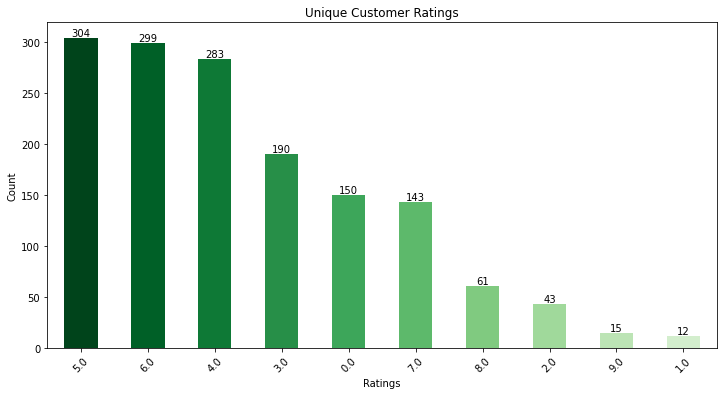

In [76]:
# Create a color map with gradients of blue
cmap = plt.get_cmap('Greens')

# Create a DataFrame with the top 5 customers
unique_rating = df['rating'].value_counts().nlargest(10)

# Create a bar chart with gradients of blue
ax = unique_rating.plot.bar(figsize=(12, 6), color=cmap(np.linspace(1, 0.2, len(unique_rating))))

# Set the title and axis labels
plt.title('Unique Customer Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.0f}'.format(v) for v in i.datavalues], fontsize=10)

# Show the plot
plt.show()


It shows the distribution of ratings given by customers, `with the highest number of ratings at 5.0 and 6.0, at 304 and 299 respectively`. The next most common rating is 4.0, with 283.

It also shows that there are a relatively low number of ratings at the extremes of the scale, with only 12 ratings at 1.0 and 15 ratings at 9.0.

This suggests that customers tend to rate products or services in the middle of the scale, with ratings of 4.0, 5.0, and 6.0 being the most common. It may also suggest that customers are generally satisfied with the products or services they are rating, as there are relatively few ratings at the low end of the scale.

However, it's important to note that this data alone does not provide information about the quality or satisfaction levels of the products or services being rated. It only shows the distribution of ratings given by customers.

Businesses can use this information to identify areas of potential improvement in their products or services, such as focusing on improving ratings in the lower end of the scale or providing incentives for customers to provide ratings at the higher end of the scale.

In [77]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [78]:
# Write a code for the repeat purchases; 0 == No, 1 == Yes
def rpt(x):
    if x == 0:
        return 'No'
    else:
        return 'Yes'
df['repeat_purchase'] = df['repeat_purchase'].apply(rpt)
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,Yes
1,2,Housing,Bird,Medium,35.98,963.60,6.0,No
2,3,Food,Dog,Medium,31.23,898.30,5.0,Yes
3,4,Medicine,Cat,Small,24.95,982.15,6.0,Yes
4,5,Housing,Cat,Small,26.18,832.63,7.0,Yes


We define a function `rpt(x)` that takes a value `x` as input. Inside the function, we check if `x` is equal to 0. If it is, we return the string 'No'. Otherwise, we return the string 'Yes'.

We then use the `apply()` function on the 'repeat_purchase' column of the DataFrame `df` to apply the `rpt()` function to each value in the column. The result is assigned back to the 'repeat_purchase' column of `df`, effectively converting the values from 0 and 1 to 'No' and 'Yes', respectively.

In [79]:
rept_pur = df['repeat_purchase'].value_counts()
rept_pur

repeat_purchase
Yes    906
No     594
Name: count, dtype: int64

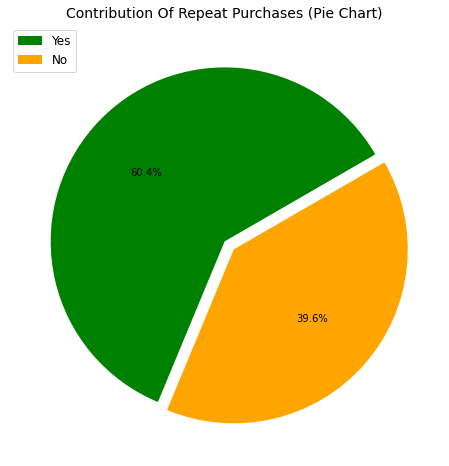

In [80]:
# Set the colors for each slice of the pie chart
colors = ['green', 'orange', 'blue', 'red']

# Set the explode parameter to highlight certain slices
explode = (0, 0.07)

# Create a figure and axis object with the figsize parameter
fig, ax = plt.subplots(figsize=(8, 8))

# Create a pie chart for the top 3 products purchased by customers
ax.pie(rept_pur, autopct='%1.1f%%', startangle=30, explode=explode, colors = colors)

# add legends
plt.legend(rept_pur.index, loc='upper left', fontsize=12)

# Set the title of the pie chart
plt.title('Contribution Of Repeat Purchases (Pie Chart)', fontsize=14)

# Show the plot
plt.show()

It shows the number of repeat purchases made by customers, with `60.4%` customers making repeat purchases and `39.6%` customers not making repeat purchases.

This suggests that a significant portion of customers are making repeat purchases, which is a positive indication of customer loyalty and satisfaction. Businesses can leverage this information to identify loyal customers and offer them incentives or rewards to encourage further repeat purchases.

In [81]:
# statistical summary of price
df['price'].describe().astype('int')

count    1500
mean       29
std         7
min        12
25%        25
50%        28
75%        33
max        54
Name: price, dtype: int32

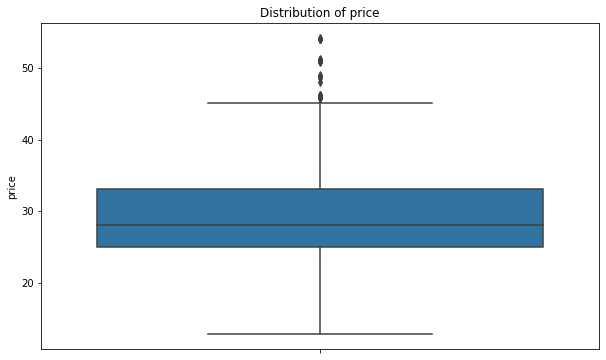

In [82]:
# view distribution of price
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'], data=df)
plt.title('Distribution of price')
plt.show()

It shows the summary statistics of the `'price'` variable, which includes 1500 observations.

The mean price is 29, which indicates that the average price of the items in the dataset is 29 units. 

The standard deviation of the prices is 7, which suggests that there is some variability in the prices of the items. 

The minimum price is 12, which is the lowest price observed in the dataset. 

The 25th percentile is 25, which means that 25% of the items have a price of 25 or lower. 

The median price is 28, which indicates that half of the items have a price lower than 28 and half have a price higher than 28. 

The 75th percentile is 33, which means that 75% of the items have a price of 33 or lower. 

The maximum price is 54, which is the highest price observed in the dataset.

### Bivariate Analysis

In [83]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,Yes
1,2,Housing,Bird,Medium,35.98,963.60,6.0,No
2,3,Food,Dog,Medium,31.23,898.30,5.0,Yes
3,4,Medicine,Cat,Small,24.95,982.15,6.0,Yes
4,5,Housing,Cat,Small,26.18,832.63,7.0,Yes


In [84]:
df.dtypes

product_id           int64
category            object
animal              object
size                object
price              float64
sales              float64
rating             float64
repeat_purchase     object
dtype: object

In [85]:
# pet everyday products by sales
prod_sales = df.groupby('category')['sales'].sum().sort_values(ascending = False)
prod_sales

category
Equipment    348875.24
Toys         319897.10
Food         287138.16
Medicine     214066.25
Housing      175330.31
Accessory    121273.44
unknown       28316.27
Name: sales, dtype: float64

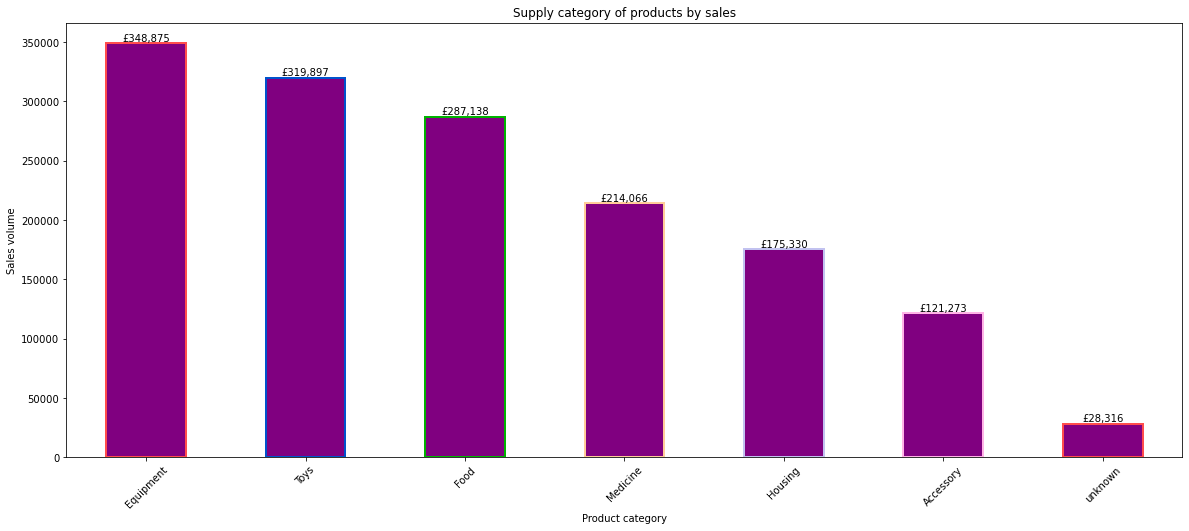

In [86]:
# Create a horizontal bar chart
plt.figure(figsize=(20, 8))
ax = prod_sales.plot.bar(color = 'purple', edgecolor=['#ff4d4d','#0052cc','#00b300','#ffcc99','#c2c2f0','#ffb3e6'], linewidth=2)

# Set the title and labels
plt.title('Supply category of products by sales')
plt.xlabel('Product category')
plt.ylabel('Sales volume')

# Add data labels to the bars
for i, v in enumerate(prod_sales.values):
    ax.text(i, v, '£{:,.0f}'.format(v), ha='center', va='bottom')
    
# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()

It shows the total sales for different categories, with the highest sales in the Equipment category at `348,875.24 pounds`. This is followed by Toys at `319,897.10 pounds` and Food at `287,138.16 pounds`.

The data also shows that there is a significant difference in sales between categories, with the lowest sales in the Accessory and unknown categories at 121,273.44 and 28,316.27 pounds respectively.

This suggests that businesses operating in the Equipment, Toys, and Food categories have a higher potential for generating revenue compared to businesses operating in the other categories. It also highlights the importance of understanding customer preferences and demand when developing product assortments and pricing strategies.

In [87]:
# category by customer rating 
cat_an_rat = df.groupby('category')['rating'].value_counts().unstack('category')
cat_an_rat

category,Accessory,Equipment,Food,Housing,Medicine,Toys,unknown
rating,,,,,,,
0.0,12.0,38.0,20.0,22.0,30.0,24.0,4.0
1.0,4.0,NaN,2.0,6.0,NaN,NaN,NaN
2.0,6.0,9.0,11.0,15.0,1.0,1.0,NaN
3.0,22.0,43.0,40.0,41.0,27.0,15.0,2.0
4.0,29.0,62.0,61.0,62.0,29.0,37.0,3.0
5.0,30.0,89.0,51.0,43.0,38.0,46.0,7.0
6.0,17.0,74.0,54.0,23.0,62.0,64.0,5.0
7.0,4.0,39.0,20.0,12.0,30.0,35.0,3.0
8.0,2.0,15.0,1.0,3.0,14.0,25.0,1.0


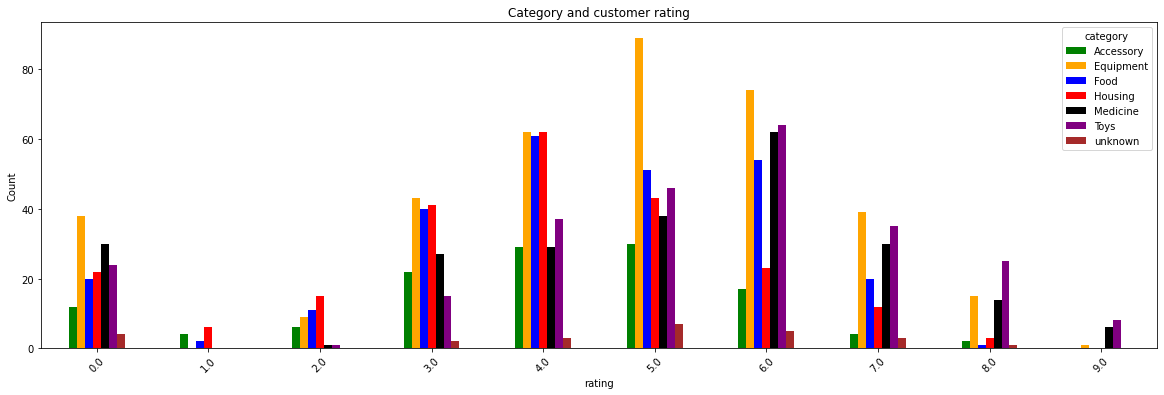

In [88]:
# plot a pivot table
colors = ['green', 'orange', 'blue', 'red', 'black', 'purple', 'brown']
cat_an_rat.plot.bar(figsize = (20, 6), color = colors)
plt.ticklabel_format(style ='plain', axis = 'y')

# Set the title and labels
plt.title('Category and customer rating', fontsize = 12)
plt.ylabel('Count')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

It shows the distribution of ratings for different categories, with the categories listed as columns and the ratings listed as rows.

Looking at the data, we can see that there is some variability in the number of ratings for each category and rating level. However, some general patterns can be observed:

- The highest number of ratings in most categories is at the 5.0 and 6.0 rating levels, with some exceptions. This suggests that customers tend to rate products or services in the middle of the scale, indicating that they are generally satisfied with their purchases.

- The number of ratings generally decreases as we move towards the extremes of the scale, with relatively few ratings at the lowest and highest levels. This may suggest that customers are less likely to rate products or services when they are extremely satisfied or dissatisfied.

In [89]:
# pet everyday product category by average price
prod_price = df.groupby('category')['price'].mean().sort_values(ascending = True).astype('int')
prod_price

category
Medicine     25
Housing      26
Equipment    26
Accessory    31
unknown      32
Toys         33
Food         33
Name: price, dtype: int32

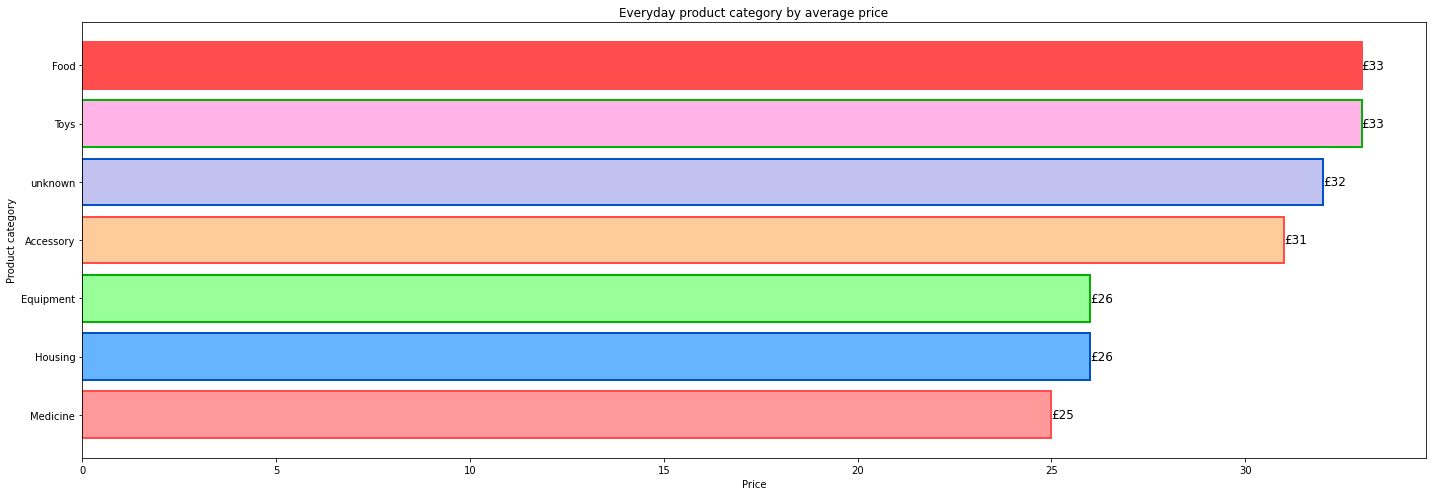

In [90]:
# Set the colors for each slice of the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#ff4d4d']

# Create a horizontal bar chart
plt.figure(figsize=(20, 7))
plt.barh(prod_price.index, prod_price.values, color=colors, edgecolor=['#ff4d4d','#0052cc','#00b300'], linewidth=2)

# Add data labels to each bar
for i, v in enumerate(prod_price.values):
    plt.text(v, i, '£{:,.0f}'.format(v), color='black', fontsize=12, ha='left', va='center')

# Set the title and labels
plt.title('Everyday product category by average price')
plt.xlabel('Price')
plt.ylabel('Product category')


plt.tight_layout()
plt.show()

It shows the number of items available in different categories, with the highest number of items available in the Food and Toys categories at `£33 each`. This is followed by the unknown category at `£32` and the Accessory category at `£31`.

The Medicine, Housing, and Equipment categories have relatively lower numbers of items available, with £25, £26, and £26 respectively.

This suggests that businesses operating in the Food and Toys categories have a higher potential for generating revenue compared to businesses operating in the other categories due to the higher number of items available.

In [43]:
# pet animals products by sales
animal_sales = df.groupby('animal')['sales'].sum().sort_values(ascending = False)
animal_sales

animal
Cat     574232.13
Dog     388405.75
Bird    274999.99
Fish    257258.90
Name: sales, dtype: float64

In [44]:
# Define the colors and labels for the pie chart
colors = ['green', 'orange', 'blue', 'red']
labels = animal_sales.index

# Create a pie chart trace with custom colors and labels
trace = go.Pie(labels=labels, values=animal_sales.values, hole=0.7,
               marker=dict(colors=colors[:1], line=dict(color='white', width=2)))

# Create a layout with a custom title
layout = go.Layout(title='Pet supply by sales')

# Create a figure with the trace and layout, and display it
fig = go.Figure(data=[trace], layout=layout)
fig.show()

It shows the total sales for different animal categories, with the highest sales in the Cat category at `574,232.13 pounds`. This is followed by the Dog category at `388,405.75 pounds`, the Bird category at `274,999.99 pounds`, and the Fish category at `257,258.90 pounds`.

This suggests that businesses operating in the Cat and Dog categories have a higher potential for generating revenue compared to businesses operating in the Bird and Fish categories. It also highlights the importance of understanding customer preferences and demand when developing product assortments and pricing strategies.

In [98]:
# Group the data by 'animal' and calculate descriptive statistics for 'price'
stats = df.groupby('animal')['price'].describe().astype('int')
stats

,count,mean,std,min,25%,50%,75%,max
animal,,,,,,,,
Bird,197,40,6,28,35,41,45,54
Cat,567,27,3,17,25,28,28,39
Dog,367,31,5,22,28,31,35,44
Fish,369,23,4,12,19,23,26,34


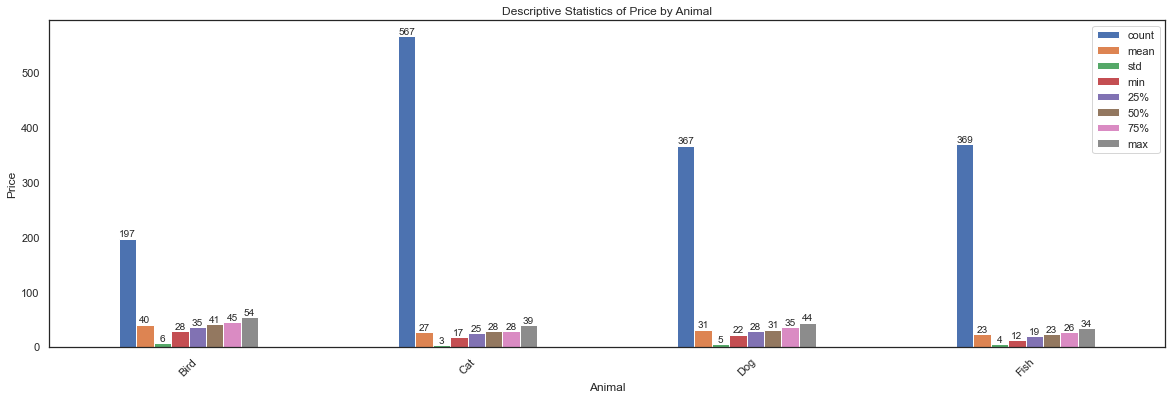

In [104]:
# Create a bar plot
ax = stats.plot(kind='bar', figsize=(20, 6))

# Set the plot title and labels
plt.title('Descriptive Statistics of Price by Animal')
plt.xlabel('Animal')
plt.ylabel('Price')

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.0f}'.format(v) for v in i.datavalues], fontsize=10)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

We can see that there are differences in the count, mean, and variability of prices across the different animal categories:

- The Cat category has the highest count at 567, indicating that there are more items in this category compared to the other categories.

- The Bird category has the highest mean price at 40 units, followed by the Dog category at 31 units, the Cat category at 27 units, and the Fish category at 23 units.

- The Bird category also has the highest standard deviation at 6 units, indicating that there is more variability in prices within this category compared to the other categories.

- The Fish category has the lowest minimum price at 12 units, indicating that there are some items in this category that are priced lower than items in the other categories.

Overall, this data provides a general overview of the distribution of prices for different animal categories. It can be used to identify differences in pricing strategies across categories and to inform decisions regarding product assortment and pricing strategies.

In [32]:
# count of unique rating for the animal supply 
# df.pivot_table(index='rating', columns='animal', values='sales', aggfunc = 'count')
count_an_rat = df.groupby('animal')['rating'].value_counts().unstack('animal')
count_an_rat

animal,Bird,Cat,Dog,Fish
rating,,,,
0.0,23.0,58.0,40.0,29.0
1.0,2.0,1.0,4.0,5.0
2.0,6.0,2.0,12.0,23.0
3.0,18.0,46.0,63.0,63.0
4.0,40.0,90.0,65.0,88.0
5.0,55.0,93.0,82.0,74.0
6.0,35.0,134.0,64.0,66.0
7.0,11.0,94.0,23.0,15.0
8.0,7.0,41.0,10.0,3.0


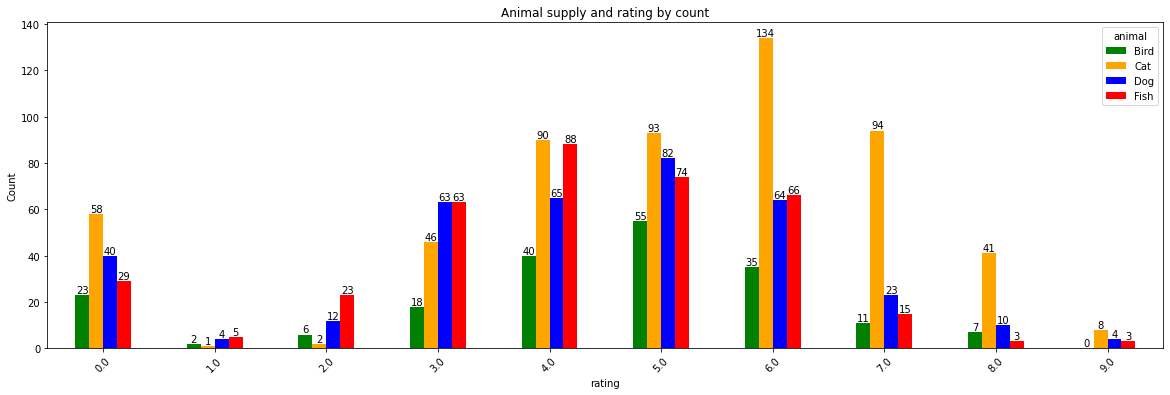

In [33]:
# plot a pivot table
colors = ['green', 'orange', 'blue', 'red']
ax = count_an_rat.plot.bar(figsize = (20, 6), color = colors)
plt.ticklabel_format(style ='plain', axis = 'y')

# Set the title and labels
plt.title('Animal supply and rating by count', fontsize = 12)
plt.ylabel('Count')

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.0f}'.format(v) for v in i.datavalues], fontsize=10)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

Looking at the data, we can see that there is some variability in the number of ratings for each category and rating level. However, some general patterns can be observed:

- The highest number of ratings in most categories is at the 5.0 rating level, with some exceptions. This suggests that customers tend to rate products or services positively.

- The number of ratings generally decreases as we move towards the extremes of the scale, with relatively few ratings at the lowest and highest levels. This may suggest that customers are less likely to rate products or services when they are extremely satisfied or dissatisfied.

Overall, this data provides insights into the distribution of ratings for different animal categories and can guide businesses in understanding customer satisfaction levels and identifying areas for improvement.

In [34]:
count_an_rep = df.groupby(['animal'])['repeat_purchase'].value_counts().unstack('repeat_purchase')
count_an_rep

repeat_purchase,No,Yes
animal,,
Bird,86,111
Cat,223,344
Dog,159,208
Fish,126,243


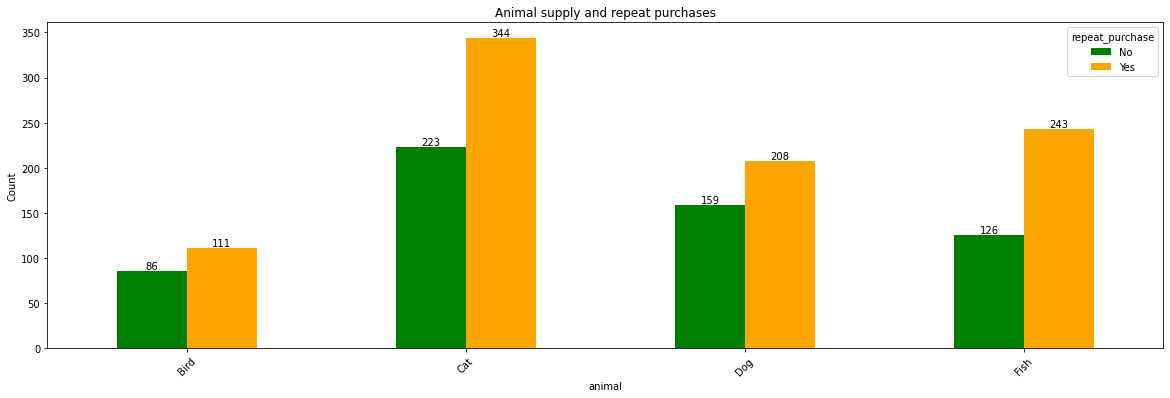

In [35]:
# plot a pivot table
colors = ['green', 'orange']
ax = count_an_rep.plot.bar(figsize = (20, 6), color = colors)
plt.ticklabel_format(style ='plain', axis = 'y')

# Set the title and labels
plt.title('Animal supply and repeat purchases', fontsize = 12)
plt.ylabel('Count')

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.0f}'.format(v) for v in i.datavalues], fontsize=10)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

We can see that there is a difference in the number of repeat purchases across the different animal categories:

- The Cat category has the highest number of repeat purchases, with 344 customers making a repeat purchase and 223 customers not making a repeat purchase.

- The Dog category has the second highest number of repeat purchases, with 208 customers making a repeat purchase and 159 customers not making a repeat purchase.

- The Fish category has the third highest number of repeat purchases, with 243 customers making a repeat purchase and 126 customers not making a repeat purchase.

- The Bird category has the lowest number of repeat purchases, with 111 customers making a repeat purchase and 86 customers not making a repeat purchase.

This data provides insights into customer behavior and loyalty within each animal category. It suggests that customers in the Cat category are more likely to make repeat purchases compared to customers in the other categories.

In [45]:
# size of animal product by sales
size_sales = df.groupby('size')['sales'].sum()
size_sales

size
Large     344648.81
Medium    388952.41
Small     761295.55
Name: sales, dtype: float64

In [46]:
# Define the colors and labels for the pie chart
colors = ['green', 'orange', 'blue', 'red']
labels = size_sales.index

# Create a pie chart trace with custom colors and labels
trace = go.Pie(labels=labels, values=size_sales.values, hole=0.7,
               marker=dict(colors=colors, line=dict(color='white', width=2)))

# Create a layout with a custom title
layout = go.Layout(title='Size of animal product by sales')

# Create a figure with the trace and layout, and display it
fig = go.Figure(data=[trace], layout=layout)
fig.show()

It shows the total sales for different size categories, with the highest sales in the Small size category at `761,295.55 pounds`. This is followed by the Medium size category at `388,952.41 pounds` and the Large size category at `344,648.81 pounds`.

This suggests that businesses catering to the Small size category have the highest potential for generating revenue, followed by the Medium and Large size categories. It highlights the importance of understanding customer preferences and demand for different sizes when developing product assortments and pricing strategies.

In [47]:
# repeat purchases and sales
rep_sales = df.groupby('repeat_purchase')['sales'].sum()
rep_sales 

repeat_purchase
No     610850.60
Yes    884046.17
Name: sales, dtype: float64

In [48]:
# Define the colors and labels for the pie chart
colors = ['green', 'orange', 'blue', 'red']
labels = rep_sales.index

# Create a pie chart trace with custom colors and labels
trace = go.Pie(labels=labels, values=rep_sales.values, hole=0.7,
               marker=dict(colors=colors[3:], line=dict(color='white', width=2)))

# Create a layout with a custom title
layout = go.Layout(title='Repeat purchases by sales')

# Create a figure with the trace and layout, and display it
fig = go.Figure(data=[trace], layout=layout)
fig.show()

We can see that customers who made repeat purchases generated higher sales compared to customers who did not make repeat purchases:

- Customers who made repeat purchases generated a total of `884,046.17 pounds` in sales.

- Customers who did not make repeat purchases generated a total of `610,850.60 pounds` in sales.

This highlights the importance of customer retention and loyalty in generating revenue for businesses. By encouraging repeat purchases and developing strategies to retain customers, businesses can increase their sales and profitability.

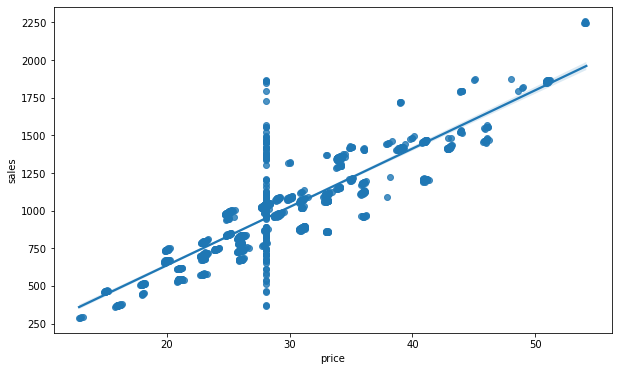

Pearsons correlation: 0.878


In [40]:
# relationship between repeat price and sales
from scipy.stats import pearsonr
plt.figure(figsize = (10, 6))
sns.regplot(x = 'price', y = 'sales', data = df)
plt.show()

# pearson correlation coefficient
corr, _ = pearsonr(x=df['price'], y=df['sales'])
print('Pearsons correlation: %.3f' % corr)

The Pearson correlation coefficient of `0.878` suggests a `strong positive linear relationship between the sales and price variables`. This means that as the price increases, the sales also tend to increase. 

### Multivariate Analysis

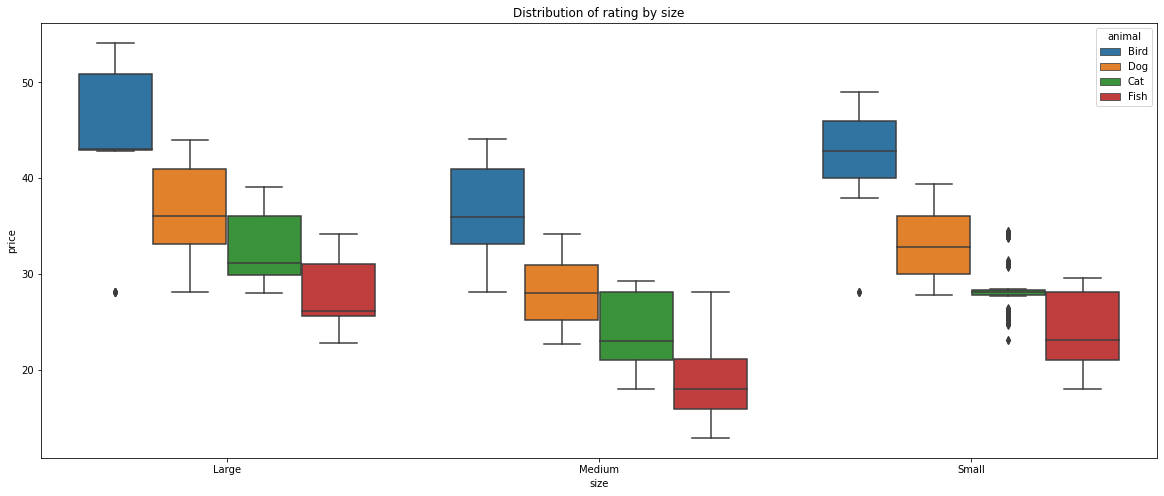

In [41]:
# view distribution of rating by size
plt.figure(figsize=(20, 8))
sns.boxplot(x=df['size'], y=df['price'], data=df, hue = df['animal'])
plt.title('Distribution of rating by size')
plt.show()

In [42]:
# animal supply and rating by sales
an_sal_rat = df.groupby(['animal', 'rating'])['sales'].sum().unstack('animal')
an_sal_rat

animal,Bird,Cat,Dog,Fish
rating,,,,
0.0,32140.68,59120.83,44260.56,21425.97
1.0,2383.84,826.49,2817.00,2036.20
2.0,6981.22,1447.98,10331.34,14029.40
3.0,23616.88,41369.18,58614.94,41969.87
4.0,52918.00,85257.20,66176.15,58483.08
5.0,75930.58,90722.77,86083.14,50974.72
6.0,49725.34,140707.14,72972.86,49089.33
7.0,17511.55,99173.20,27837.02,12445.81
8.0,13791.90,45900.59,13251.17,2914.17


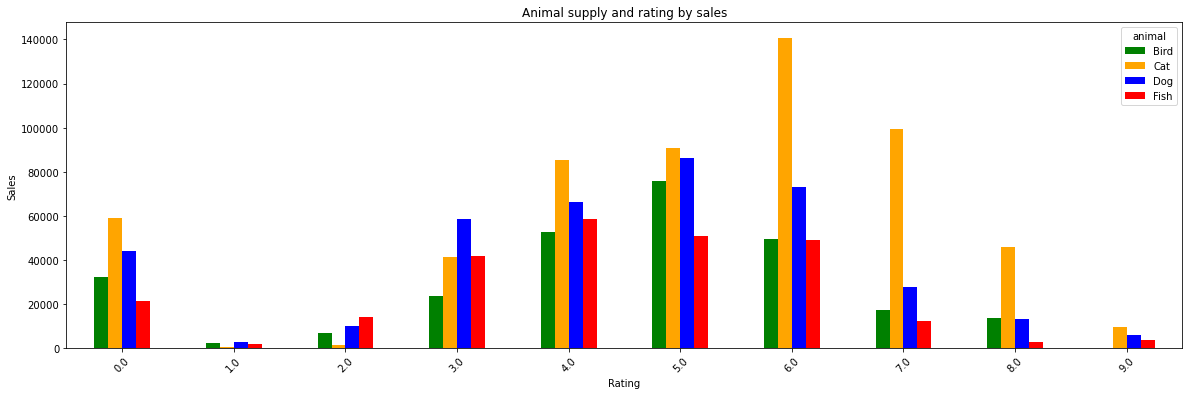

In [43]:
# plot a pivot table
colors = ['green', 'orange', 'blue', 'red']
an_sal_rat.plot.bar(figsize = (20, 6), color = colors)
plt.ticklabel_format(style ='plain', axis = 'y')

# Set the title and labels
plt.title('Animal supply and rating by sales', fontsize = 12)
plt.xlabel('Rating')
plt.ylabel('Sales')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

Looking at the data, we can see that there are differences in sales across the different animal categories and rating levels:

- The Cat category has the highest sales in most rating levels, except for the 0.0 and 5.0 rating levels where the Bird category has the highest sales.

- The Fish category has the lowest sales in most rating levels, except for the 2.0 and 3.0 rating levels where the Bird category has the lowest sales.

- Sales generally increase as we move towards higher rating levels, with some exceptions. For example, the 5.0 rating level has lower sales than the 4.0 rating level in the Fish category.

In [44]:
# product category and repeat purchases by rating
cat_rep_rat = df.groupby(['category', 'repeat_purchase'])['rating'].count().unstack('repeat_purchase')
cat_rep_rat

repeat_purchase,No,Yes
category,,
Accessory,56,70
Equipment,149,221
Food,109,151
Housing,75,152
Medicine,84,153
Toys,110,145
unknown,11,14


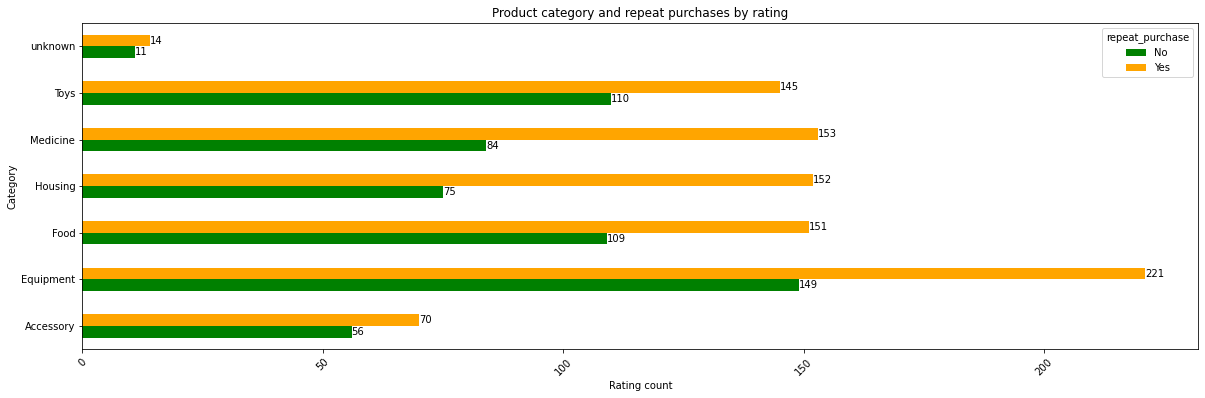

In [45]:
# plot a pivot table
colors = ['green', 'orange', 'blue', 'red']
ax = cat_rep_rat.plot.barh(figsize = (20, 6), color = colors)
plt.ticklabel_format(style ='plain', axis = 'x')

# Set the title and labels
plt.title('Product category and repeat purchases by rating', fontsize = 12)
plt.xlabel('Rating count')
plt.ylabel('Category')

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.0f}'.format(v) for v in i.datavalues], fontsize=10)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

Looking at the data, we can see that there is variation in the number of repeat purchases across different categories:

- The Equipment category has the highest number of repeat purchases, with 221 customers making a repeat purchase and 149 customers not making a repeat purchase.

- The Medicine category has the second highest number of repeat purchases, with 153 customers making a repeat purchase and 84 customers not making a repeat purchase.

- The Food and Housing categories also have a relatively high number of repeat purchases, with 151 and 152 customers making a repeat purchase, respectively.

- The Accessory, Toys, and unknown categories have a lower number of repeat purchases compared to the other categories.

This data provides insights into customer behavior and loyalty within each category. It suggests that customers are more likely to make repeat purchases in categories such as Equipment, Medicine, Food, and Housing. Businesses can use this information to develop customer retention strategies and targeted marketing campaigns to encourage repeat purchases in specific categories.

In [46]:
# product supply category and rating by sales
cat_sal_rat = df.groupby(['category', 'rating'])['sales'].sum().unstack('category')
cat_sal_rat

category,Accessory,Equipment,Food,Housing,Medicine,Toys,unknown
rating,,,,,,,
0.0,11128.69,36795.26,25752.01,19504.70,29034.21,29990.98,4742.19
1.0,2571.60,NaN,1081.45,4410.48,NaN,NaN,NaN
2.0,5379.96,6536.14,9262.40,9974.41,670.98,966.05,NaN
3.0,17305.46,38380.25,38681.60,29119.54,22943.13,17175.73,1965.16
4.0,27484.43,55639.03,62940.77,45326.02,24894.22,43867.71,2682.25
5.0,33382.73,83973.83,57170.15,32600.66,31880.11,55082.40,9621.33
6.0,17288.43,70559.17,64871.46,20175.31,52929.63,81803.17,4867.50
7.0,4252.50,39964.09,25921.63,11014.22,29544.37,43251.72,3019.05
8.0,2479.64,16004.19,1456.69,3204.97,14607.81,36685.74,1418.79


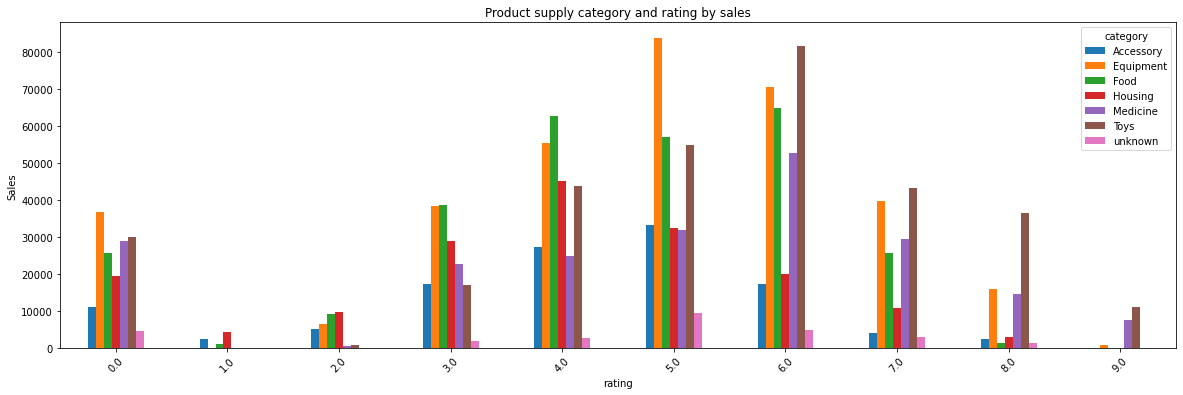

In [47]:
# plot a pivot table
cat_sal_rat.plot.bar(figsize = (20, 6))
plt.ticklabel_format(style ='plain', axis = 'y')
# Set the title and labels
plt.title('Product supply category and rating by sales', fontsize = 12)
plt.ylabel('Sales')
# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

Looking at the data, we can see that there are differences in sales across different categories and rating levels:

- The Equipment category has the highest sales in most rating levels, except for the 0.0, 1.0, and 5.0 rating levels where the Toys category has the highest sales.

- The Food category has the lowest sales in most rating levels, except for the 1.0 rating level where the Accessory category has the lowest sales.

- Sales generally increase as we move towards higher rating levels, with some exceptions. For example, the 5.0 rating level has lower sales than the 4.0 rating level in the Housing category.

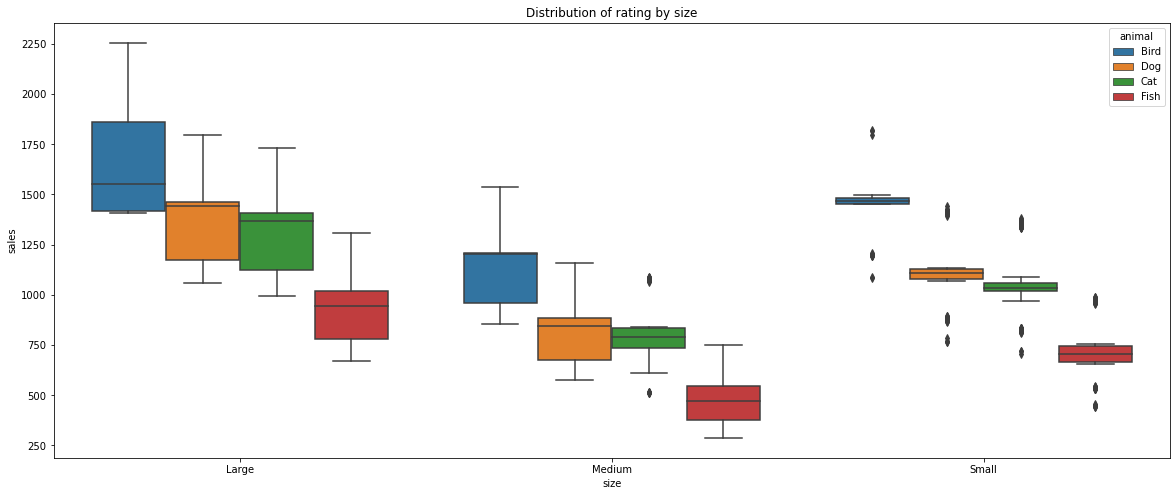

In [55]:
# view distribution of size and sales by animal
plt.figure(figsize=(20, 8))
sns.boxplot(x=df['size'], y=df['sales'], data=df, hue = df['animal'])
plt.title('Distribution of rating by size')
plt.show()

In [49]:
# size and sales by repeat purchase
size_sal_rep = df.groupby(['size', 'repeat_purchase'])['sales'].sum().unstack('repeat_purchase')
size_sal_rep

repeat_purchase,No,Yes
size,,
Large,142408.58,202240.23
Medium,149522.21,239430.20
Small,318919.81,442375.74


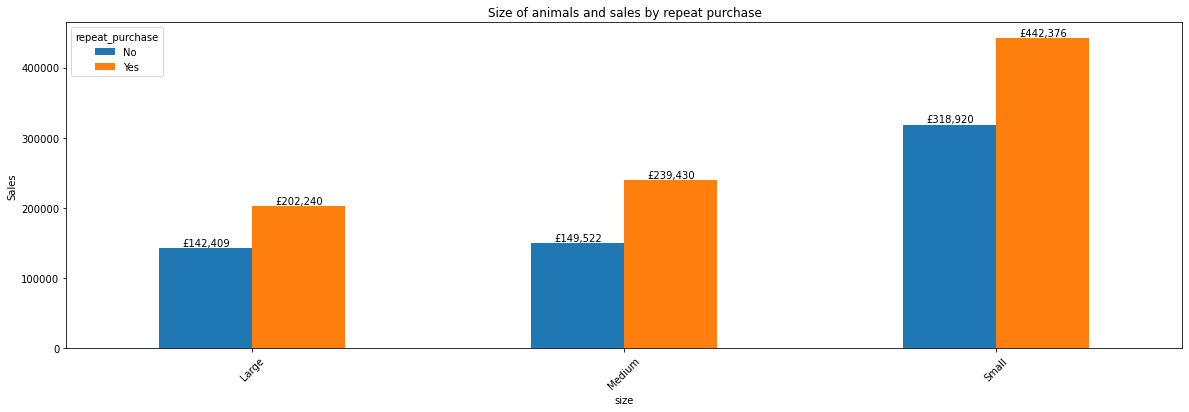

In [50]:
# plot a pivot table
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#ff4d4d']
ax = size_sal_rep.plot.bar(figsize = (20, 6))
plt.ticklabel_format(style ='plain', axis = 'y')
# Set the title and labels
plt.title('Size of animals and sales by repeat purchase', fontsize = 12)
plt.ylabel('Sales')

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['£{:,.0f}'.format(v) for v in i.datavalues], fontsize=10)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

Looking at the data, we can see that there are differences in sales across different size categories and repeat purchase status:

- The Small size category has the highest sales in both the No and Yes repeat purchase status, with 318,919.81 pounds in sales for No and 442,375.74 pounds in sales for Yes.

- The Medium size category has the second highest sales in both the No and Yes repeat purchase status, with 149,522.21 pounds in sales for No and 239,430.20 pounds in sales for Yes.

- The Large size category has the lowest sales in both the No and Yes repeat purchase status, with 142,408.58 pounds in sales for No and 202,240.23 pounds in sales for Yes.

This data provides insights into the relationship between size category and repeat purchase status. It suggests that customers are more likely to purchase from the Small and Medium size categories, regardless of their repeat purchase status. This information can be used to inform decisions regarding product assortment and pricing strategies to optimize sales performance.

In [51]:
# size and average price by repeat purchase
size_price_rep = df.groupby(['size', 'repeat_purchase'])['price'].mean().unstack('repeat_purchase')
size_price_rep

repeat_purchase,No,Yes
size,,
Large,37.163558,36.569767
Medium,26.972665,25.575226
Small,29.571039,28.333767


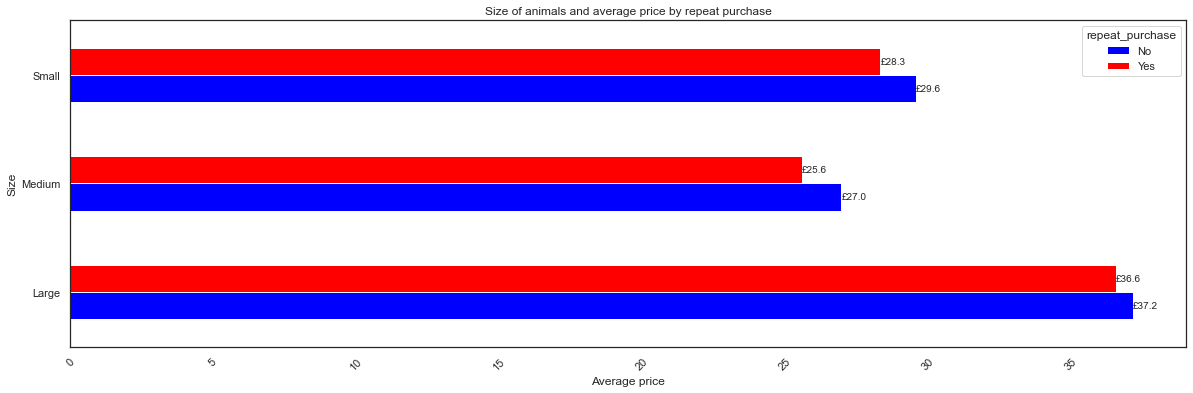

In [124]:
# plot a pivot table
colors = ['green', 'orange', 'blue', 'red']
ax = size_price_rep.plot.barh(figsize = (20, 6), color = colors[2:])
plt.ticklabel_format(style ='plain', axis = 'x')
# Set the title and labels
plt.title('Size of animals and average price by repeat purchase', fontsize = 12)
plt.xlabel('Average price')
plt.ylabel('Size')

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['£{:,.1f}'.format(v) for v in i.datavalues], fontsize=10)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

Looking at the data, we can see that there are small differences in the percentage of customers who made a repeat purchase across different size categories:

- The Large size category has the highest percentage of customers who made a repeat purchase, with 36.57% of customers making a repeat purchase.

- The Small size category has the second highest percentage of customers who made a repeat purchase, with 28.33% of customers making a repeat purchase.

- The Medium size category has the lowest percentage of customers who made a repeat purchase, with 25.58% of customers making a repeat purchase.

It suggests that customers are more likely to make a repeat purchase in the Large and Small size categories compared to the Medium size category. This information can be used to develop customer retention strategies and targeted marketing campaigns to encourage repeat purchases in specific size categories.

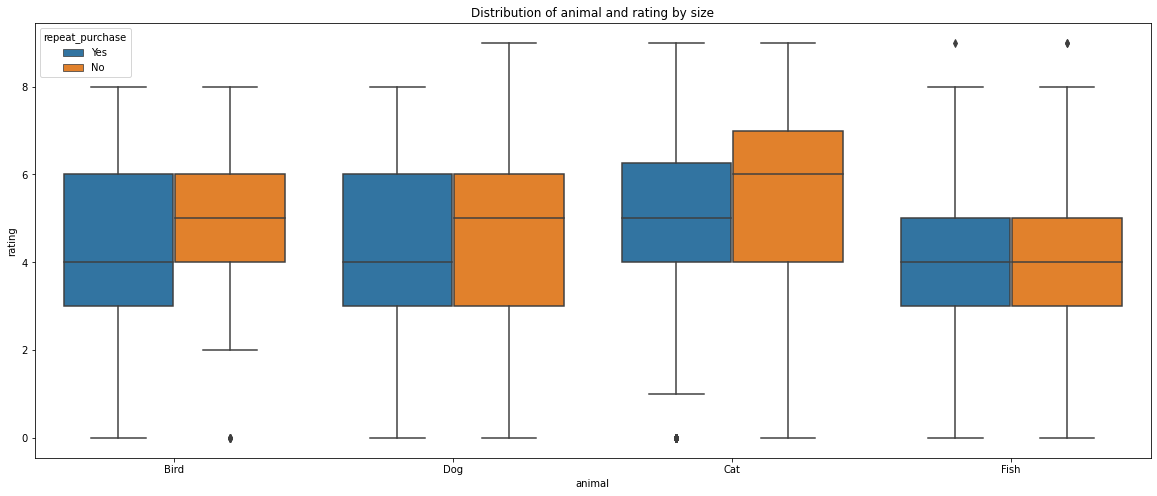

In [53]:
# view distribution of animal and rating by repeat purchase
plt.figure(figsize=(20, 8))
sns.boxplot(x=df['animal'], y=df['rating'], data=df, hue = df['repeat_purchase'])
plt.title('Distribution of animal and rating by size')
plt.show()

In [121]:
# Calculate the summary statistics of 'price', 'sales', and 'rating'
summary_stats = df[['price', 'sales', 'rating']].describe().astype('int')

# Print the summary statistics
print(summary_stats)

       price  sales  rating
count   1500   1500    1500
mean      29    996       4
std        7    323       2
min       12    286       0
25%       25    747       3
50%       28   1000       5
75%       33   1158       6
max       54   2255       9


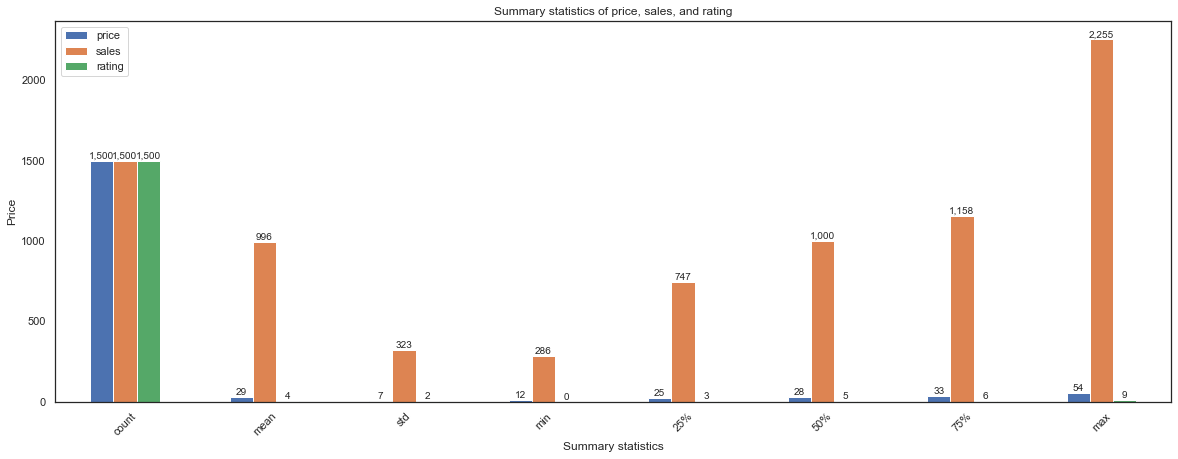

In [122]:
# Create a bar plot
ax = summary_stats.plot(kind='bar', figsize=(20, 7))

# Set the plot title and labels
plt.title('Summary statistics of price, sales, and rating')
plt.xlabel('Summary statistics')
plt.ylabel('Price')

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.0f}'.format(v) for v in i.datavalues], fontsize=10)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

Looking at the data, we can see the following information:

- The product has a price range between 12 and 54 pounds, with a mean price of 29 pounds and a standard deviation of 7 pounds.
- The product has a sales range between 286 and 2255 pounds, with a mean sales of 996 pounds and a standard deviation of 323 pounds.
- The product has a rating range between 0 and 9, with a mean rating of 4 and a standard deviation of 2.

The quartile values provide additional information about the distribution of the data:

- The 25th percentile for price is 25 pounds, indicating that 25% of the prices are less than or equal to 25 pounds.
- The 50th percentile (or median) for price is 28 pounds, indicating that half of the prices are less than or equal to 28 pounds.
- The 75th percentile for price is 33 pounds, indicating that 75% of the prices are less than or equal to 33 pounds.

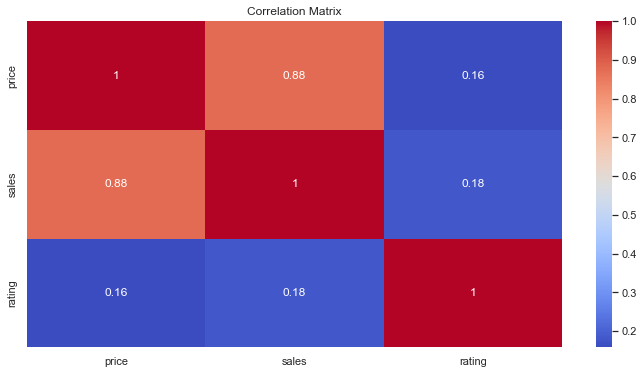

In [70]:
# Create a correlation matrix of the numerical features
corr_matrix = df[['price', 'sales', 'rating']].corr()

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Create a heatmap using seaborn
sns.set(style='white')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Set the title and axis labels
ax.set_title('Correlation Matrix')

# Show the plot
plt.show()

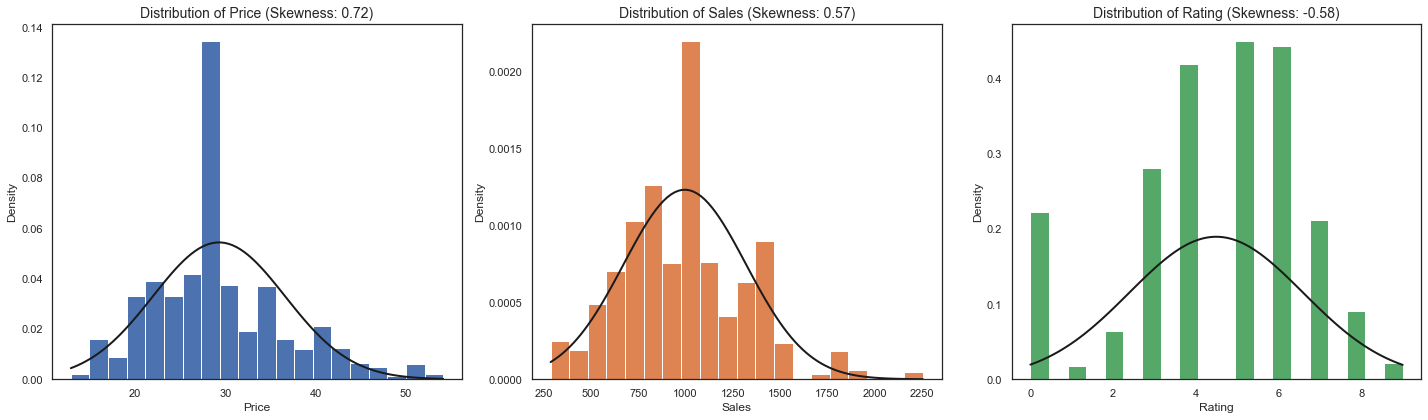

In [67]:
from scipy.stats import norm
# Select the columns to plot
cols = ['price', 'sales', 'rating']

# Create a figure with subplots for each column
fig, axs = plt.subplots(nrows=1, ncols=len(cols), figsize=(20, 6))

# Loop over each column and create a histogram plot
for i, col in enumerate(cols):
    # Remove null values from the data
    data = df[col].dropna()
    # Set the color of the histogram bars
    color = f'C{i}'
    # Plot the histogram
    axs[i].hist(data, bins=20, color=color, density=True)
    # Fit a normal distribution to the data
    mu, std = norm.fit(data)
    x = np.linspace(data.min(), data.max(), 100)
    p = norm.pdf(x, mu, std)
    axs[i].plot(x, p, 'k', linewidth=2)
    # Calculate the skewness of the data
    skewness = data.skew()
    # Set the axis labels and title
    axs[i].set_xlabel(col.capitalize(), fontsize=12)
    axs[i].set_ylabel('Density', fontsize=12)
    axs[i].set_title(f'Distribution of {col.capitalize()} (Skewness: {skewness:.2f})', fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In your case, *the distribution of "price" and "sales" both have a `skewness of 0.72, and 0.57` respectively, which indicates that these distributions are positively skewed.* This means that there is a longer or fatter tail on the right side of the distributions. In other words, there are more extreme values on the higher end of the scale compared to the lower end.

On the other hand, *the distribution of "rating" has a `skewness of -0.58`, which indicates that it is negatively skewed.* This means that there is a longer or fatter tail on the left side of the distribution. In this case, there are more extreme values on the lower end of the scale compared to the higher end.


The skewness of the distributions of "price", "sales", and "rating" in an online retail business can provide valuable insights for decision making. Here are a few ways it can translate to business decisions:

*1. Pricing Strategy: Understanding the skewness of the price distribution can help in determining the optimal pricing strategy. A positively skewed price distribution suggests that there may be a higher demand for higher-priced products. This information can be used to adjust pricing tiers, introduce premium products, or offer discounts on lower-priced items to attract customers.*

*2. Inventory Management: The skewness of the sales distribution can help in managing inventory effectively. A positively skewed sales distribution implies that a few products have significantly higher sales compared to the majority. Identifying these high-selling products can help in prioritizing their availability and ensuring sufficient stock levels to meet customer demand.*

*3. Product Selection: Analyzing the skewness of the rating distribution can assist in product selection and assortment decisions. A negatively skewed rating distribution indicates that there are more products with lower ratings. This insight can guide businesses to review and improve the quality of low-rated products or consider removing them from the inventory to maintain customer satisfaction.*

*4. Marketing and Promotions: Skewness information can be utilized for targeted marketing and promotional campaigns. For instance, if high-priced products have a positively skewed distribution, marketing efforts can focus on highlighting the unique features or value propositions of these products to attract customers who are inclined towards premium purchases.*

*5. Customer Segmentation: Skewness analysis can aid in customer segmentation based on preferences and purchasing behavior. By considering the skewness of different product categories, businesses can identify customer segments that align with specific product types and tailor marketing strategies accordingly.*

## Business Reconmendation

*Based on the provided summary statistics and insights, here are some business recommendations:*

1. Inventory Management and Supply Chain Optimization: Given that the majority of transactions involve small quantities of products, businesses should focus on optimizing their inventory management. This includes ensuring adequate stock levels for products with median or below-median quantities (e.g., 3 or lower) while avoiding overstocking.

2. Pricing Strategies: The wide variation in unit prices suggests that businesses should adopt flexible pricing strategies that reflect the diversity of their product offerings. Consider pricing adjustments based on factors such as product category, brand, and customer segment to maximize profitability.

3. Customer-Centric Marketing and Sales: As sales amounts vary widely, businesses should adopt marketing and sales strategies tailored to customer preferences. Customer segmentation and targeted marketing campaigns can help maximize sales and revenue.

4. Category-Based Marketing: Focus marketing efforts on popular categories like Equipment, Food, and Toys. Allocate resources efficiently based on customer demand and prioritize product development or promotions in these categories.

5. Pet Category Insights: Acknowledge the popularity of cats as pets and consider offering a wider range of cat-related products. Additionally, invest in understanding the needs and preferences of customers who own dogs, fish, and birds to tailor product offerings accordingly.

6. Size Category Considerations: Recognize that smaller-sized items are preferred by customers, likely due to factors like affordability and convenience. Develop or highlight small-sized products in your offerings and marketing efforts.

7. Customer Loyalty Programs: Leverage the high percentage (60.4%) of repeat purchases to establish customer loyalty programs. Reward loyal customers with incentives or discounts to encourage further repeat purchases.

8. Product Pricing and Assortment: Analyze the correlation between sales and price (0.878). Consider adjusting pricing strategies to maximize sales while ensuring profitability.

7. Ratings and Customer Feedback: Although customers tend to rate products in the middle of the scale, analyze lower ratings (1.0 and 2.0) to identify areas for improvement. Consider soliciting more feedback and reviews to enhance product quality and customer satisfaction.

8. Category-Specific Retention Strategies: Develop category-specific customer retention strategies, especially for Equipment, Medicine, Food, and Housing categories, where customers are more likely to make repeat purchases.

9. Optimizing Product Sizes: Recognize that Large and Small size categories have the highest percentage of customers making repeat purchases. Consider optimizing product sizes in these categories based on customer preferences.

10. Understanding Skewness: Understand the skewness of price, sales, and rating distributions. Positive skewness in price and sales indicates the presence of higher-priced and higher-sales items, which might warrant special attention.

11. Price Segmentation: Consider segmenting pricing strategies based on the skewed distribution of prices. Differentiate pricing for products with higher and lower price points to cater to diverse customer preferences.

12. Market Research: Regularly gather customer feedback, conduct market research, and monitor trends to adapt and evolve your business strategies in response to changing customer preferences and market dynamics.

These recommendations can help businesses make informed decisions to enhance their operations, customer satisfaction, and overall competitiveness.